In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from watermark import watermark
%load_ext watermark
%watermark -a "Kannan Singaravelu" -u -d -v -m -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Kannan Singaravelu

Last updated: 2023-03-23

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 22.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

numpy     : 1.21.5
matplotlib: 3.5.2
pandas    : 1.4.4



In [11]:
# Kannan Singaravelu
# https://github.com/kannansingaravelu
# Helper functions to plot binomial tree
# Save the file as '.py' on the same location 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import networkx as nx
import warnings
warnings.filterwarnings('ignore')


# Hard coded for Binomial Plot
n = 4 #hard coded

# Plot Binomial Grid
def binomial_grid(n):

    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    
    nx.draw(G,pos=posG)

# Plot Asset Path - Text 
def plot_asset_path():

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(0.02,0.49,'S')

    # Step 1
    plt.figtext(0.3,0.66,'uS')
    plt.figtext(0.3,0.3,'vS')

    # Step 2
    plt.figtext(0.5,0.76,'$u^2S$')
    plt.figtext(0.5,0.55,'uvS')
    plt.figtext(0.5,0.22,'$v^2S$')

    # Step 3
    plt.figtext(0.7,0.86,'$u^3S$')
    plt.figtext(0.7,0.66,'$u^2vS$') 
    plt.figtext(0.7,0.45,'$uv^2S$')
    plt.figtext(0.7,0.11,'$v^3S$')

    # Step 4
    plt.figtext(0.9,0.95,'$u^4S$')
    plt.figtext(0.9,0.75,'$u^3vS$')
    plt.figtext(0.9,0.55,'$u^2v^2S$')
    plt.figtext(0.9,0.35,'$uv^3S$')
    plt.figtext(0.9,0.03,'$v^4S$')

    binomial_grid(n)

# Plot Probability - Text
def plot_probability():

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(0.02,0.49,'1')

    # Step 1
    plt.figtext(0.3,0.66,'p')
    plt.figtext(0.3,0.3,'1-p')

    # Step 2
    plt.figtext(0.5,0.76,'$p^2$')
    plt.figtext(0.5,0.55,'2p(1-p)')
    plt.figtext(0.5,0.20,'$(1-p)^2$')

    # Step 3
    plt.figtext(0.7,0.86,'$p^3$')
    plt.figtext(0.7,0.66,'$3p^2(1-p)$')
    plt.figtext(0.7,0.45,'$3p(1-p)^2$')
    plt.figtext(0.7,0.11,'$(1-p)^3$')

    # Step 4
    plt.figtext(0.9,0.95,'$p^4$')
    plt.figtext(0.9,0.75,'$4p^3(1-p)$')
    plt.figtext(0.9,0.55,'$6p^2(1-p)^2$')
    plt.figtext(0.9,0.35,'$4p(1-p)^3$')
    plt.figtext(0.9,0.00,'$(1-p)^4$')

    binomial_grid(n)

# Plot Price and Option Tree
def plot_binomial_tree(initial_spot, asset_array, option_array, delta_array):

    s = initial_spot
    px = asset_array
    opx = option_array
    delta = delta_array

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(-0.07,0.50, 'S = '+str(s))
    plt.figtext(-0.07,0.47, 'V = '+str(opx[0,0]))
    plt.figtext(-0.07,0.44, '$\Delta$ = '+str(delta[0,0]))

    # Step 1
    plt.figtext(0.27,0.73, 'S = '+str(px[0,1]))
    plt.figtext(0.27,0.70, 'V = '+str(opx[0,1]))
    plt.figtext(0.27,0.67, '$\Delta$ = '+str(delta[0,1]))
    plt.figtext(0.27,0.30, 'S = '+str(px[1,1]))
    plt.figtext(0.27,0.27, 'V = '+str(opx[1,1]))
    plt.figtext(0.27,0.24, '$\Delta$ = '+str(delta[1,1]))

    # Step 2
    plt.figtext(0.5,0.84, 'S = '+str(px[0,2]))
    plt.figtext(0.5,0.81, 'V = '+str(opx[0,2]))
    plt.figtext(0.5,0.78, '$\Delta$ = '+str(delta[0,2]))
    plt.figtext(0.5,0.63, 'S = '+str(px[1,2]))
    plt.figtext(0.5,0.60, 'V = '+str(opx[1,2]))
    plt.figtext(0.5,0.57, '$\Delta$ = '+str(delta[1,2]))
    plt.figtext(0.5,0.20, 'S = '+str(px[2,2]))
    plt.figtext(0.5,0.17, 'V = '+str(opx[2,2]))
    plt.figtext(0.5,0.14, '$\Delta$ = '+str(delta[2,2]))

    # Step 3
    plt.figtext(0.7,0.96, 'S = '+str(px[0,3]))
    plt.figtext(0.7,0.93, 'V = '+str(opx[0,3]))
    plt.figtext(0.7,0.90, '$\Delta$ = '+str(delta[0,3]))
    plt.figtext(0.7,0.73, 'S = '+str(px[1,3]))
    plt.figtext(0.7,0.70, 'V = '+str(opx[1,3]))
    plt.figtext(0.7,0.67, '$\Delta$ = '+str(delta[1,3]))
    plt.figtext(0.7,0.50, 'S = '+str(px[2,3]))
    plt.figtext(0.7,0.47, 'V = '+str(opx[2,3]))
    plt.figtext(0.7,0.43, '$\Delta$ = '+str(delta[2,3]))
    plt.figtext(0.7,0.09, 'S = '+str(px[3,3]))
    plt.figtext(0.7,0.06, 'V = '+str(opx[3,3]))
    plt.figtext(0.7,0.03, '$\Delta$ = '+str(delta[3,3]))

    # Step 4
    plt.figtext(0.9,1.05, 'S = '+str(px[0,4]))
    plt.figtext(0.9,1.02, 'V = '+str(opx[0,4]))
    plt.figtext(0.9,0.99, '$\Delta$ = '+str(delta[0,4]))
    plt.figtext(0.9,0.83, 'S = '+str(px[1,4]))
    plt.figtext(0.9,0.80, 'V = '+str(opx[1,4]))
    plt.figtext(0.9,0.77, '$\Delta$ = '+str(delta[1,4]))
    plt.figtext(0.9,0.60, 'S = '+str(px[2,4]))
    plt.figtext(0.9,0.57, 'V = '+str(opx[2,4]))
    plt.figtext(0.9,0.54, '$\Delta$ = '+str(delta[2,4]))
    plt.figtext(0.9,0.39, 'S = '+str(px[3,4]))
    plt.figtext(0.9,0.36, 'V = '+str(opx[3,4]))
    plt.figtext(0.9,0.33, '$\Delta$ = '+str(delta[3,4]))
    plt.figtext(0.9,-0.01, 'S = '+str(px[4,4]))
    plt.figtext(0.9,-0.04, 'V = '+str(opx[4,4]))
    plt.figtext(0.9,-0.07, '$\Delta$ = '+str(delta[4,4]))

    binomial_grid(n)

In [4]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    
    Function to calculate binomial option pricing for european call option
    
    Params
    ------
    spot       -int or float    - spot price
    strike     -int or float    - strike price
    rate       -float           - interest rate
    time       -int or float    - expiration time
    steps      -int             - number of time steps
    output     -int             - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    --------
    out: ndarray
    An array object of price, payoff, option value and delta as specified by the output flag
    
    """
    
    # define parameters
    ts = time / steps
    u  = 1 + sigma*np.sqrt(ts) 
    v  = 1 - sigma*np.sqrt(ts)
    p  = 0.5 + rate *np.sqrt(ts) / (2*sigma)
    df = 1/(1+rate*ts)
    
    # initialize the arrays
    px = np.zeros((steps+1, steps+1))
    cp = np.zeros((steps+1, steps+1))
    V = np.zeros((steps+1, steps+1))
    d = np.zeros((steps+1, steps+1))
    
    # binomial loop : forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * np.power(v,i) * np.power(u,j-i)
            cp[i,j] = np.maximum(px[i,j] - strike, 0)
         
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0 
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)

    return results[output]

In [5]:
S = 100 # initial stock price
r = 0.05 # interest rate
E = 100 # strike price
T = 1 # maturity date
steps = 4 # time steps
vols = np.arange(0.05, 0.85, 0.05) # a range of volatilities

Investigate the relationship between volatility and option values

Text(0, 0.5, 'option values')

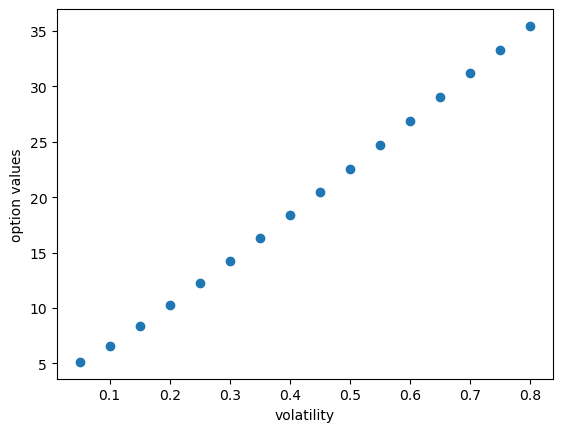

In [6]:
# calculate the option value for sigma_lst
opts = np.zeros(len(vols))

for i in range(len(vols)):
    sigma = vols[i]
    opt = binomial_option(S, E, r, sigma, T, steps, 2)
    opts[i] = opt[0][0]

# plot option values against volatilities
fig, ax = plt.subplots()
ax.scatter(vols, opts)
ax.set_xlabel("volatility")
ax.set_ylabel("option values")

As volatility goes up, the option value becomes more expensive. High risk corresponds to high price

Now let's fix the volatility to 0.2 and vary the number of time steps. In this case, we want to find out the relationship between option values and the number of time steps

Text(0, 0.5, 'option values')

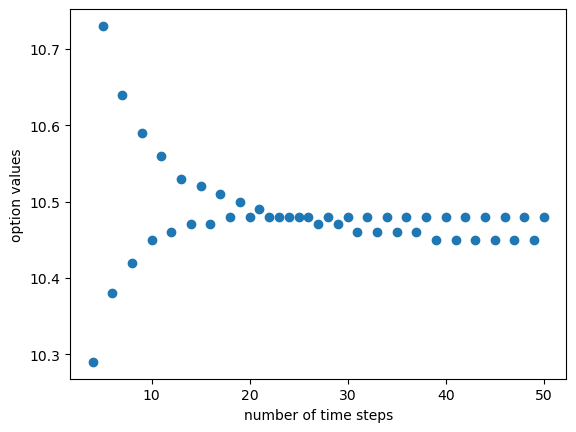

In [7]:
# number of time steps
nts_lst = np.arange(4, 51, 1)
# fix the volatility 
sigma_fixed = 0.2
# option values
opts = np.zeros(len(nts_lst))
# calculate option value for varying nts
for i in range(len(nts_lst)):
    nts = nts_lst[i] # time step
    opt = binomial_option(S, E, r, sigma_fixed, T, nts, 2)
    opts[i] = opt[0][0]

# plot option values against volatilities
fig2, ax2 = plt.subplots()
ax2.scatter(nts_lst, opts)
ax2.set_xlabel("number of time steps")
ax2.set_ylabel("option values")

Interesting. The option value is alternating. Why is that?

Let's fix the volatility and plot a binomial tree.

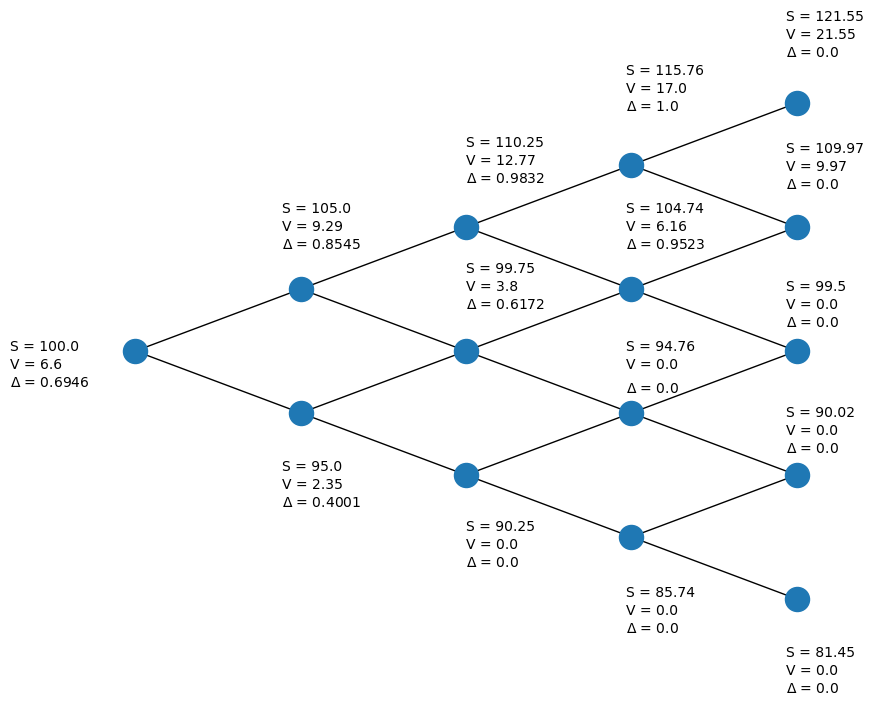

In [12]:
S = 100 # initial stock price
r = 0.05 # interest rate
E = 100 # strike price
T = 1 # maturity date
steps = 4 # time steps
sigma = 0.1 # volatility
px = binomial_option(S,E,r,sigma,T,steps,0) # asset price
opt = binomial_option(S,E,r,sigma,T,steps,2) # option price
delta = binomial_option(S,E,r,sigma,T,steps,3) # option delta
plot_binomial_tree(px[0,0], px, opt, delta)